In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import os
import re
from scipy import signal
from scipy.signal import find_peaks
from matplotlib.dates import date2num
from matplotlib.collections import LineCollection
plt.rcParams['pdf.fonttype'] = 42


In [2]:
df_tot = pd.read_csv("./_results_LIM.csv")
print(df_tot)

       CellID   LinkID   ImgNo    Lineage   RoiArea(Cir)  \
0          22      NaN       0     [ 22 ]            716   
1          22      NaN       1     [ 22 ]            716   
2          22      NaN       2     [ 22 ]            716   
3          22      NaN       3     [ 22 ]            716   
4          22      NaN       4     [ 22 ]            716   
...       ...      ...     ...        ...            ...   
14163   23099      NaN     195  [ 23099 ]            716   
14164   23099      NaN     196  [ 23099 ]            716   
14165   23099      NaN     197  [ 23099 ]            716   
14166   23099      NaN     198  [ 23099 ]            716   
14167   23099      NaN     199  [ 23099 ]            716   

        AverageBrightness(Cir)_C0   AverageBrightness(Cir)_C1  \
0                       51.583799                 1746.421788   
1                       62.688547                 1809.786313   
2                       68.610335                 2018.851955   
3                  

In [ ]:
cells_to_track = ["29", "56", "76", "22", "199", "72", "46", "51", "3146"]
df_tot_cyclin = pd.DataFrame({})
df_tot_pcna = pd.DataFrame({})
for cell in cells_to_track:
    origin = "[ " + cell + " ]"
    short = "[ " + cell + "_1 ]"
    long = "[ " + cell + "_2 ]"
    
    df_origin = df_tot.loc[df_tot[" Lineage"] == origin]
    df_short = df_tot.loc[df_tot[" Lineage"] == short]
    df_long = df_tot.loc[df_tot[" Lineage"] == long]
    
    df_cyclin_short = pd.concat([df_origin[" AverageBrightness_C0"], df_short[" AverageBrightness_C0"]], ignore_index=True)
    df_cyclin_long = pd.concat([df_origin[" AverageBrightness_C0"], df_long[" AverageBrightness_C0"]], ignore_index=True)
    df_pcna_short = pd.concat([df_origin[" SD_C1"]/df_origin[" AverageBrightness_C1"], df_short[" SD_C1"]/df_short[" AverageBrightness_C1"]], ignore_index=True)
    df_pcna_long = pd.concat([df_origin[" SD_C1"]/df_origin[" AverageBrightness_C1"], df_long[" SD_C1"]/df_long[" AverageBrightness_C1"]], ignore_index=True)

    df_cyclin_short = df_cyclin_short[0: min(len(df_cyclin_short), 50)]
    df_cyclin_long = df_cyclin_long[0: min(len(df_cyclin_long), 50)]
    df_pcna_short = df_pcna_short[0: min(len(df_pcna_short), 50)]
    df_pcna_long = df_pcna_long[0: min(len(df_pcna_long), 50)]
    
    time_short = [(i-len(df_origin))*5 for i in range(len(df_cyclin_short))]
    time_long = [(i-len(df_origin))*5 for i in range(len(df_cyclin_long))]
    
    temp = pd.DataFrame([time_short, df_cyclin_short, ["short" for i in range(len(time_short))]], index=["time", "cyclin", "strain"])
    df_tot_cyclin = pd.concat([df_tot_cyclin, temp.T], ignore_index=True)
    temp = pd.DataFrame([time_long, df_cyclin_long, ["long" for i in range(len(time_short))]], index=["time", "cyclin", "strain"])
    df_tot_cyclin = pd.concat([df_tot_cyclin, temp.T], ignore_index=True)
    temp = pd.DataFrame([time_short, df_pcna_short, ["short" for i in range(len(time_short))]], index=["time", "pcna", "strain"])
    df_tot_pcna = pd.concat([df_tot_pcna, temp.T], ignore_index=True)
    temp = pd.DataFrame([time_long, df_pcna_long, ["long" for i in range(len(time_short))]], index=["time", "pcna", "strain"])
    df_tot_pcna = pd.concat([df_tot_pcna, temp.T], ignore_index=True)


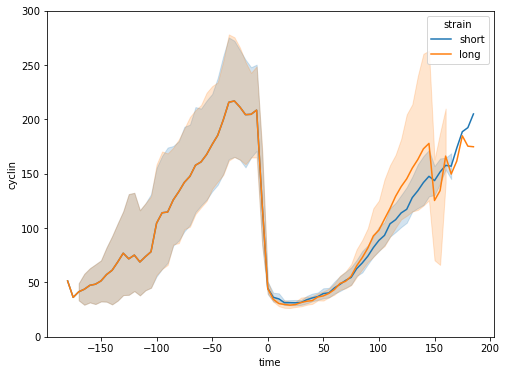

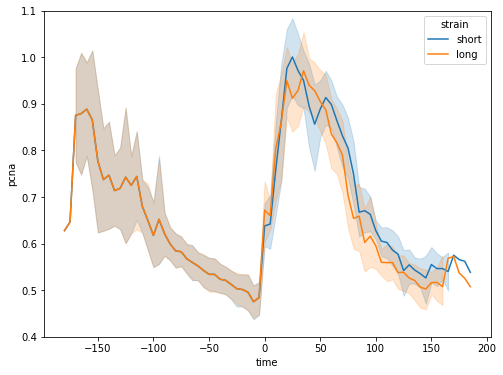

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x="time", y="cyclin", data=df_tot_cyclin, ax=ax, hue="strain")
ax.set_ylim(0, 300)
plt.savefig("./_cyclin_short-vs-long.png")
plt.savefig("./_cyclin_short-vs-long.pdf")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x="time", y="pcna", data=df_tot_pcna, ax=ax, hue="strain")
ax.set_ylim(0.4, 1.1)
plt.savefig("./_pcna_short-vs-long.png")
plt.savefig("./_pcna_short-vs-long.pdf")
